<a href="https://colab.research.google.com/github/arpan-sharma/Machine-learning_projects/blob/main/tyr_to_predict_coco_cola_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description:- This Program predicts the price of coco cola stock for a specific day  

In [1]:
#import libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Load data

In [2]:
from google.colab import files
files.upload()

Saving KO.csv to KO (2).csv


{'KO.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2016-08-01,43.689999,43.830002,43.430000,43.450001,36.867889,12349700\n2016-08-02,43.349998,43.580002,43.310001,43.529999,36.935768,12825200\n2016-08-03,43.660000,43.700001,43.369999,43.639999,37.029099,12119100\n2016-08-04,43.560001,43.799999,43.400002,43.509998,36.918804,11244100\n2016-08-05,43.650002,43.750000,43.410000,43.480000,36.893349,10398200\n2016-08-08,43.430000,43.520000,43.220001,43.439999,36.859394,8680300\n2016-08-09,43.500000,43.639999,43.380001,43.470001,36.884857,7281300\n2016-08-10,43.639999,43.689999,43.500000,43.610001,37.003651,8412100\n2016-08-11,43.720001,43.869999,43.619999,43.750000,37.122444,11303300\n2016-08-12,43.910000,44.189999,43.790001,44.029999,37.360031,10928900\n2016-08-15,44.099998,44.330002,44.009998,44.240002,37.538216,10390600\n2016-08-16,44.250000,44.250000,43.830002,43.830002,37.190331,9706100\n2016-08-17,44.009998,44.070000,43.779999,44.060001,37.385490,11208500\n2016-08-18,44.009998,44.2

In [3]:
#Store Data 
df = pd.read_csv('KO.csv')
#show data 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-01,43.689999,43.830002,43.430000,43.450001,36.867889,12349700
1,2016-08-02,43.349998,43.580002,43.310001,43.529999,36.935768,12825200
2,2016-08-03,43.660000,43.700001,43.369999,43.639999,37.029099,12119100
3,2016-08-04,43.560001,43.799999,43.400002,43.509998,36.918804,11244100
4,2016-08-05,43.650002,43.750000,43.410000,43.480000,36.893349,10398200
...,...,...,...,...,...,...,...
1254,2021-07-26,56.889999,57.119999,56.560001,57.060001,57.060001,8680500
1255,2021-07-27,57.110001,57.540001,56.919998,57.259998,57.259998,12793800
1256,2021-07-28,56.990002,57.160000,56.630001,56.740002,56.740002,9855700
1257,2021-07-29,57.070000,57.250000,56.860001,57.049999,57.049999,9599100


In [4]:
#show And Store last 1 month of data 
actual_price = df.tail(21)
#show the data
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
1238,2021-07-01,54.340000,54.480000,53.860001,53.959999,53.959999,13214700
1239,2021-07-02,54.000000,54.450001,54.000000,54.180000,54.180000,10604600
1240,2021-07-06,53.990002,54.090000,53.549999,53.880001,53.880001,15278200
1241,2021-07-07,53.720001,54.380001,53.720001,54.320000,54.320000,14377700
1242,2021-07-08,54.009998,54.169998,53.740002,54.130001,54.130001,11943900
1243,2021-07-09,54.250000,54.520000,54.180000,54.459999,54.459999,10845500
1244,2021-07-12,54.320000,54.599998,54.270000,54.480000,54.480000,15107600
1245,2021-07-13,54.950001,55.299999,54.750000,55.020000,55.020000,15170800
1246,2021-07-14,55.020000,56.349998,54.959999,56.259998,56.259998,22002700
1247,2021-07-15,56.240002,56.470001,55.910000,56.439999,56.439999,15068200


In [5]:
#for train data get all data except last monnth data 
train_data = df.head(len(df)-21)
#show dataset 
train_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1233,2021-06-24,54.259998,54.419998,54.000000,54.389999,54.389999,11488400
1234,2021-06-25,54.240002,54.470001,54.009998,54.320000,54.320000,18880300
1235,2021-06-28,54.250000,54.369999,54.000000,54.259998,54.259998,10556900
1236,2021-06-29,54.130001,54.340000,53.720001,53.860001,53.860001,12300900
1237,2021-06-30,53.799999,54.180000,53.750000,54.110001,54.110001,14614200


In [6]:
#create empyt list 
days = list()
adj_close_prices = list()

In [7]:
#get only days and adj_close_prices
train_data_days = train_data.loc[:,'Date']
train_data_adj_close = train_data.loc[:,'Adj Close']
# print(train_data_days)


In [8]:
#create indepedent data set (dates) 
import re
for day in train_data_days:
  d = day
  new = re.sub('[^0-9]', '', str(d))
  days.append([int(new)])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_days = scaler.fit(days)
# #create dependent data set(adj close price)
for adj_close_price in train_data_adj_close:
  adj_close_prices.append(float(adj_close_price))
  

In [9]:
days = scaler.transform(days)

In [10]:
#create 3 Models 
lin_svr = SVR(kernel='linear',C=1000.0)
lin_svr.fit(days,adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
poly_svr = SVR(kernel='poly',C=1000.0,degree=2)
poly_svr.fit(days,adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [12]:
rbf_svr = SVR(kernel='rbf',C=1000.0,gamma=0.85)
rbf_svr.fit(days,adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.85,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<function matplotlib.pyplot.show>

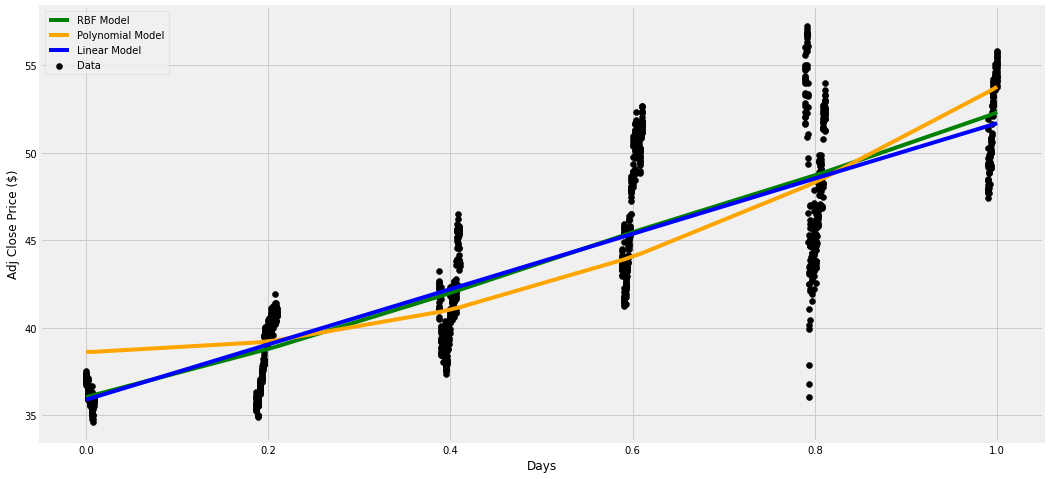

In [13]:
#plots models 
plt.figure(figsize=(16,8))
plt.scatter(days,adj_close_prices,color = 'black',label='Data')
plt.plot(days,rbf_svr.predict(days),color='green',label='RBF Model')
plt.plot(days,poly_svr.predict(days),color='orange',label='Polynomial Model')
plt.plot(days,lin_svr.predict(days),color='blue',label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price ($)')
plt.legend()
plt.show

In [30]:
#show the predicted price for givien date 
up_date = []
date = '2021-07-01'
new = re.sub('[^0-9]', '', date)
up_date.append([int(new)])


print('The RBf SVR Predicted Price:', rbf_svr.predict(up_date))
# print('The Poly SVR Predicted Price:', poly_svr.predict(up_date))
# print('The Liner SVR Predicted Price:', lin_svr.predict(up_date))


The RBf SVR Predicted Price: [51.7883579]
